# The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.

# Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.
 
# The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

# Big mart sales prediction  


## Import modules

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

## Loading the dataset

In [ ]:
df = pd.read_csv('Train.csv')
df.head()

In [46]:
# statistical info
df.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years,Outlet
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.892995,0.070213,7.226681,140.992782,1.453596,1.112871,1.201220,7.297863,1.093864,15.168133,4.722281
std,4.226124,0.895005,0.048742,4.209990,62.275067,0.683084,0.812757,0.796459,1.015211,0.522090,8.371760,2.837201
min,4.555000,0.000000,0.003575,0.000000,31.290000,0.000000,0.000000,0.000000,3.534854,0.000000,4.000000,0.000000
25%,9.310000,0.000000,0.033085,4.000000,93.826500,1.000000,0.000000,1.000000,6.727728,1.000000,9.000000,2.000000
50%,12.857645,1.000000,0.062517,6.000000,143.012800,2.000000,1.000000,1.000000,7.492945,1.000000,14.000000,5.000000
75%,16.000000,2.000000,0.094585,10.000000,185.643700,2.000000,2.000000,1.000000,8.039898,1.000000,26.000000,7.000000
max,21.350000,2.000000,0.328391,15.000000,266.888400,2.000000,2.000000,3.000000,9.479448,2.000000,28.000000,9.000000


In [47]:
# datatype of attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int32  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int32  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   object 
 8   Outlet_Size                8523 non-null   int32  
 9   Outlet_Location_Type       8523 non-null   int32  
 10  Outlet_Type                8523 non-null   int32  
 11  Item_Outlet_Sales          8523 non-null   float64
 12  New_Item_Type              8523 non-null   int32  
 13  Outlet_Years               8523 non-null   int64

In [48]:
# check unique values in dataset
df.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   418
Item_Fat_Content                3
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
New_Item_Type                   3
Outlet_Years                    9
Outlet                         10
dtype: int64

## Preprocessing the dataset

In [49]:
# check for null values
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
New_Item_Type                0
Outlet_Years                 0
Outlet                       0
dtype: int64

In [50]:
# check for categorical attributes
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year']

In [51]:
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')
cat_col

['Outlet_Establishment_Year']

In [52]:
# print the categorical columns
for col in cat_col:
    print(col)
    print(df[col].value_counts())
    print()

Outlet_Establishment_Year
Outlet_Establishment_Year
1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: count, dtype: int64



In [53]:
# fill the missing values
item_weight_mean = df.pivot_table(values = "Item_Weight", index = 'Item_Identifier')
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600000
DRA24,17.495041
DRA59,9.416911
DRB01,9.212548
DRB13,6.115000
...,...
NCZ30,7.485378
NCZ41,19.850000
NCZ42,10.500000


In [54]:
miss_bool = df['Item_Weight'].isnull()
miss_bool

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [55]:
for i, item in enumerate(df['Item_Identifier']):
    if miss_bool[i]:
        if item in item_weight_mean:
            df['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            df['Item_Weight'][i] = np.mean(df['Item_Weight'])

In [56]:
df['Item_Weight'].isnull().sum()

0

In [57]:
outlet_size_mode = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode

Outlet_Type,0,1,2,3
Outlet_Size,2,2,1,1


In [58]:
miss_bool = df['Outlet_Size'].isnull()
df.loc[miss_bool, 'Outlet_Size'] = df.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [59]:
df['Outlet_Size'].isnull().sum()

0

In [60]:
sum(df['Item_Visibility']==0)

0

In [61]:
# replace zeros with mean
df.loc[:, 'Item_Visibility'].replace([0], [df['Item_Visibility'].mean()], inplace=True)

In [62]:
sum(df['Item_Visibility']==0)

0

In [63]:
# combine item fat content
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
0    3918
2    3006
1    1599
Name: count, dtype: int64

## Creation of New Attributes

In [64]:
df['New_Item_Type'] = df['Item_Identifier'].apply(lambda x: x[:2])
df['New_Item_Type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [65]:
df['New_Item_Type'] = df['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
df['New_Item_Type'].value_counts()

New_Item_Type
Food              6125
Non-Consumable    1599
Drinks             799
Name: count, dtype: int64

In [66]:
df.loc[df['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
0             3918
2             3006
Non-Edible    1599
Name: count, dtype: int64

In [67]:
# create small values for establishment year
df['Outlet_Years'] = 2013 - df['Outlet_Establishment_Year']

TypeError: unsupported operand type(s) for -: 'int' and 'str'

In [ ]:
df['Outlet_Years']

In [ ]:
df.head()

## Exploratory Data Analysis

<Axes: xlabel='Item_Weight', ylabel='Density'>

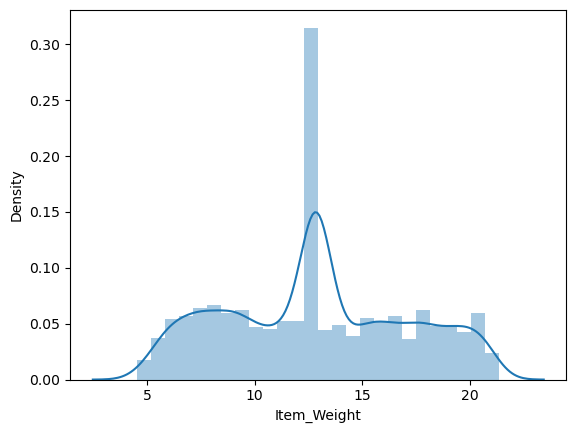

In [68]:
sns.distplot(df['Item_Weight'])

<Axes: xlabel='Item_Visibility', ylabel='Density'>

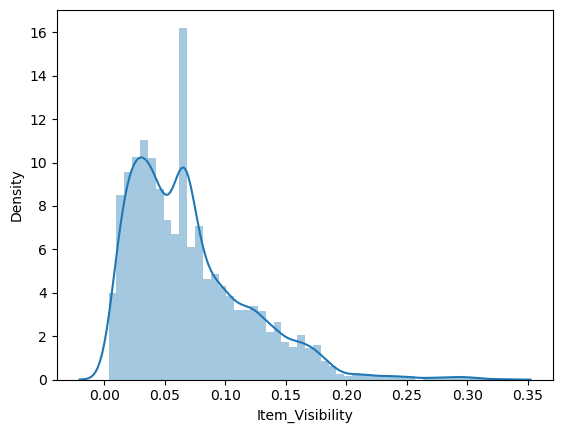

In [69]:
sns.distplot(df['Item_Visibility'])

<Axes: xlabel='Item_MRP', ylabel='Density'>

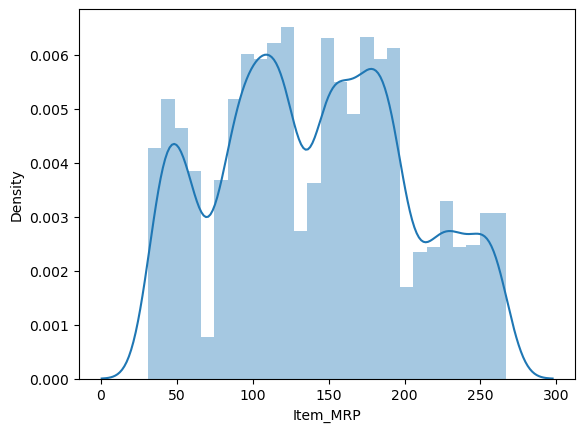

In [70]:
sns.distplot(df['Item_MRP'])

<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

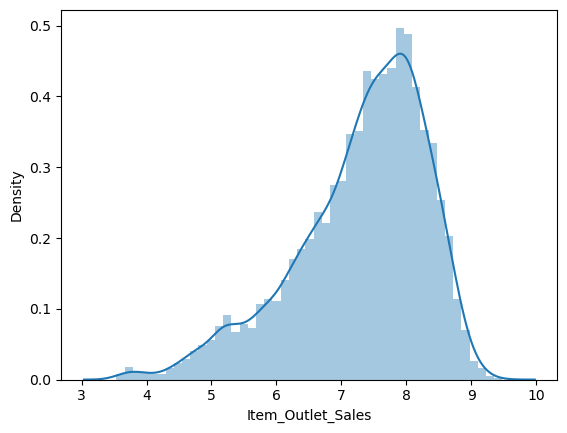

In [71]:
sns.distplot(df['Item_Outlet_Sales'])

In [72]:
# log transformation
df['Item_Outlet_Sales'] = np.log(1+df['Item_Outlet_Sales'])

<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

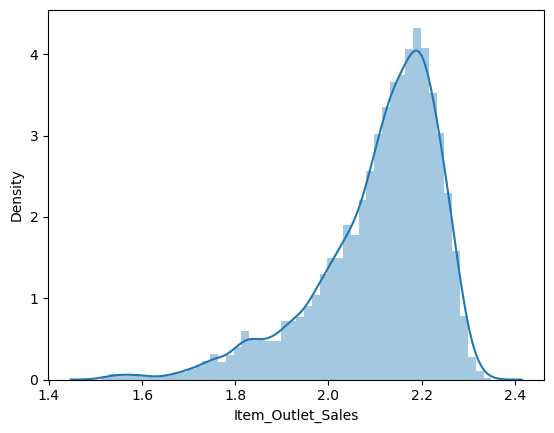

In [73]:
sns.distplot(df['Item_Outlet_Sales'])

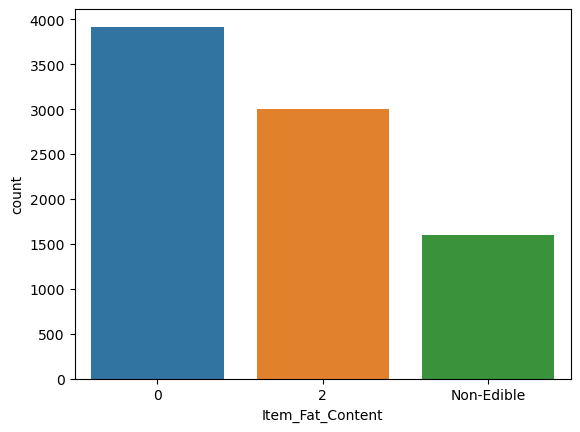

In [74]:
sns.countplot(data=df, x="Item_Fat_Content")

plt.show()

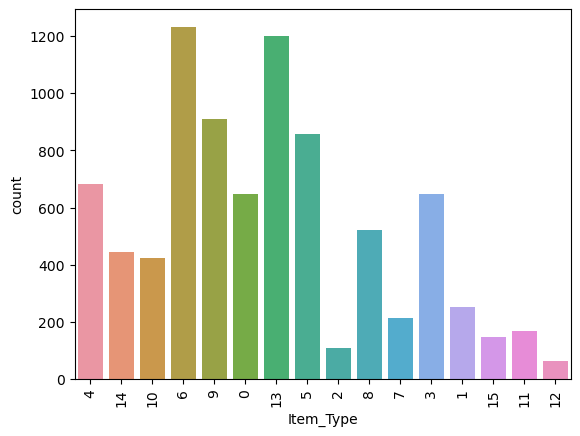

In [75]:


df['Item_Type'] = df['Item_Type'].astype(str)

l = list(df['Item_Type'].unique())

chart = sns.countplot(data=df, x="Item_Type")

chart.set_xticklabels(labels=l, rotation=90)

# Show the plot
plt.show()


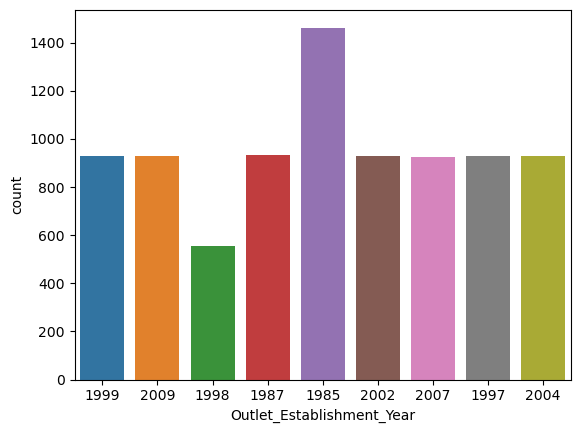

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

df['Outlet_Establishment_Year'] = df['Outlet_Establishment_Year'].astype(str)

sns.countplot(data=df, x='Outlet_Establishment_Year')

plt.show()


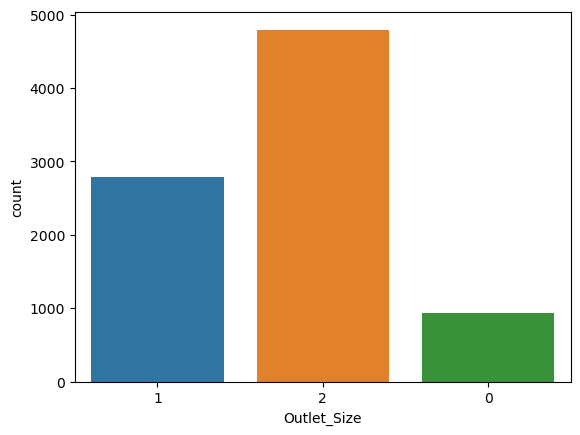

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

df['Outlet_Size'] = df['Outlet_Size'].astype(str)


sns.countplot(data=df, x='Outlet_Size')

# Show the plot
plt.show()


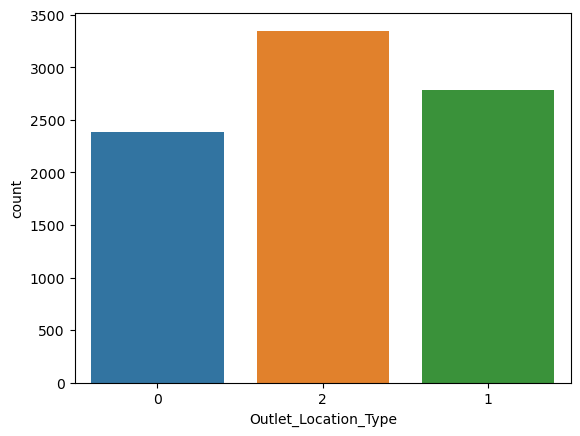

In [78]:
df['Outlet_Location_Type'] = df['Outlet_Location_Type'].astype(str)
sns.countplot(data=df, x='Outlet_Location_Type')
plt.show()


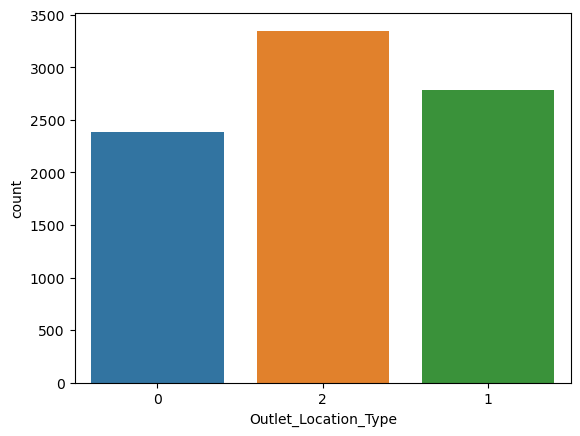

In [79]:
df['Outlet_Location_Type'] = df['Outlet_Location_Type'].astype(str)
sns.countplot(data=df, x='Outlet_Location_Type')
plt.show()


## Coorelation Matrix



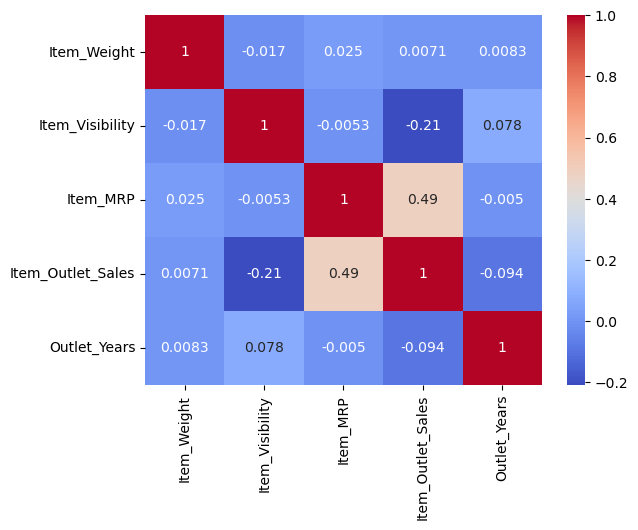

In [80]:
non_numeric_columns = df.select_dtypes(exclude=['float64', 'int64']).columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

df[non_numeric_columns] = df[non_numeric_columns].astype(str)

corr = df[numeric_columns].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')

plt.show()


In [81]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years,Outlet
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,2.222005,Food,14,9
1,DRC01,5.92,2,0.019278,14,48.2692,OUT018,2009,1,2,2,1.959641,Drinks,4,3
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,2.157429,Food,14,9
3,FDX07,19.20,2,0.066132,6,182.0950,OUT010,1998,2,2,0,2.027841,Food,15,0
4,NCD19,8.93,Non-Edible,0.066132,9,53.8614,OUT013,1987,0,2,1,2.067300,Non-Consumable,26,1


## Label Encoding

In [82]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years,Outlet
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,2.222005,Food,14,9
1,DRC01,5.92,2,0.019278,14,48.2692,OUT018,2009,1,2,2,1.959641,Drinks,4,3
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,2.157429,Food,14,9
3,FDX07,19.20,2,0.066132,6,182.0950,OUT010,1998,2,2,0,2.027841,Food,15,0
4,NCD19,8.93,Non-Edible,0.066132,9,53.8614,OUT013,1987,0,2,1,2.067300,Non-Consumable,26,1


## Onehot Encoding

In [99]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd


df_object_columns = df.select_dtypes(include=['object']).columns
df[df_object_columns] = df[df_object_columns].astype(str)

le = LabelEncoder()

df['Outlet'] = le.fit_transform(df['Outlet_Identifier'])

cat_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type']

for col in cat_col:
    df[col] = le.fit_transform(df[col])

print(df.head())

  Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  \
0           FDA15         9.30                 0         0.016047         10   
1           DRC01         5.92                 1         0.019278          6   
2           FDN15        17.50                 0         0.016760          2   
3           FDX07        19.20                 1         0.066132         12   
4           NCD19         8.93                 2         0.066132         15   

   Item_MRP Outlet_Identifier Outlet_Establishment_Year  Outlet_Size  \
0  249.8092            OUT049                      1999            1   
1   48.2692            OUT018                      2009            1   
2  141.6180            OUT049                      1999            1   
3  182.0950            OUT010                      1998            2   
4   53.8614            OUT013                      1987            0   

   Outlet_Location_Type  Outlet_Type  Item_Outlet_Sales  New_Item_Type  \
0           

  Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  \
0           FDA15         9.30                 0         0.016047         10   
1           DRC01         5.92                 1         0.019278          6   
2           FDN15        17.50                 0         0.016760          2   
3           FDX07        19.20                 1         0.066132         12   
4           NCD19         8.93                 2         0.066132         15   

   Item_MRP Outlet_Identifier Outlet_Establishment_Year  Outlet_Size  \
0  249.8092            OUT049                      1999            1   
1   48.2692            OUT018                      2009            1   
2  141.6180            OUT049                      1999            1   
3  182.0950            OUT010                      1998            2   
4   53.8614            OUT013                      1987            0   

   Outlet_Location_Type  Outlet_Type  Item_Outlet_Sales  New_Item_Type  \
0           

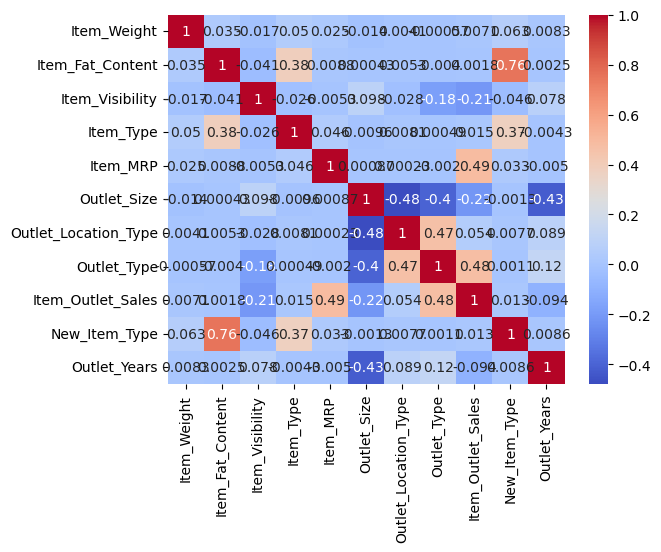

In [100]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Convert object columns to string type
df_object_columns = df.select_dtypes(include=['object']).columns
df[df_object_columns] = df[df_object_columns].astype(str)

# Initialize LabelEncoder
le = LabelEncoder()

# Encode 'Outlet_Identifier' using LabelEncoder
df['Outlet'] = le.fit_transform(df['Outlet_Identifier'])

# Encode categorical columns using LabelEncoder
cat_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type']

for col in cat_col:
    # Check if the column exists in the DataFrame before encoding
    if col in df.columns:
        df[col] = le.fit_transform(df[col])
    else:
        print(f"Warning: Column '{col}' not found in DataFrame.")

# Verify the changes
print(df.head())

# Calculate the correlation matrix for numeric columns only
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
corr = df[numeric_columns].corr()

# Create a heatmap with annotations using Seaborn
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Show the plot
plt.show()


## Input Split

In [101]:
X = df.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

## Model Training

In [121]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
def train(model, X, y):
    # train the model
    model.fit(X, y)
    
    # predict the training set
    pred = model.predict(X)
    
    # perform cross-validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print("Model Report")
    print("MSE:",mean_squared_error(y,pred))
    print("CV Score:", cv_score)

Model Report
MSE: 0.00747377382287771
CV Score: 0.007495715433061928


<Axes: title={'center': 'Model Coefficients'}>

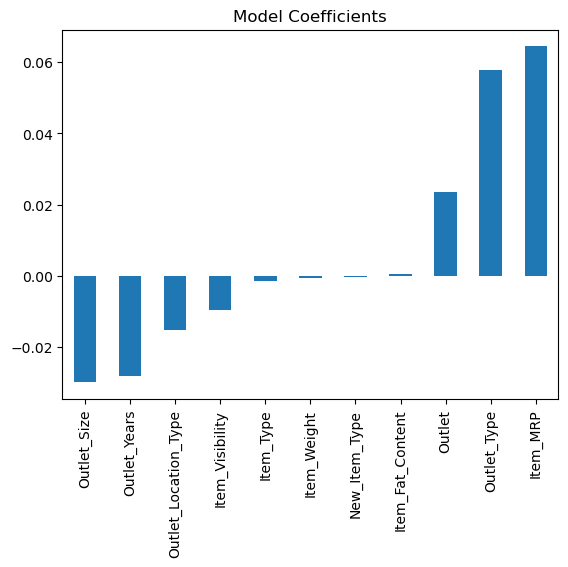

In [122]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming 'X' and 'y' are your features and target variable

# Normalize features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train the Linear Regression model
model = LinearRegression()
train(model, X_scaled, y)

# Get the coefficients and sort them
coef = pd.Series(model.coef_, X.columns).sort_values()

# Plot the coefficients
coef.plot(kind='bar', title="Model Coefficients")


Model Report
MSE: 0.0074737740406619615
CV Score: 0.007495708123927858


<Axes: title={'center': 'Model Coefficients'}>

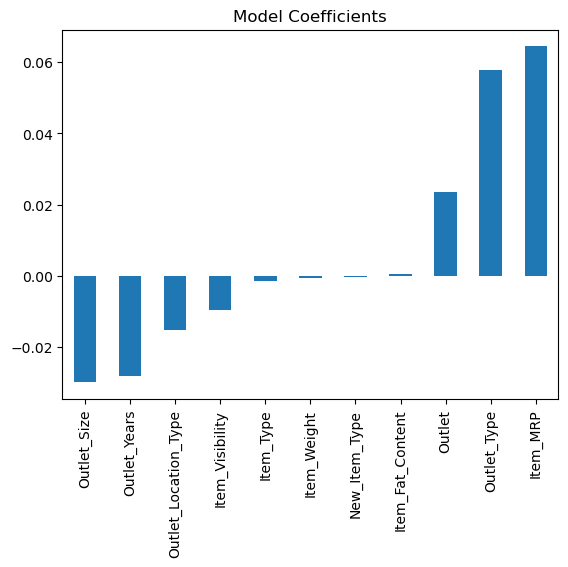

In [123]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming 'X' and 'y' are your features and target variable

# Normalize features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train the Ridge model
model = Ridge(alpha=1.0)  # You can adjust the alpha parameter as needed
train(model, X_scaled, y)

# Get the coefficients and sort them
coef = pd.Series(model.coef_, X.columns).sort_values()

# Plot the coefficients
coef.plot(kind='bar', title="Model Coefficients")


Model Report
MSE: 0.013594993236871487
CV Score: 0.013598925452435013


<Axes: title={'center': 'Model Coefficients'}>

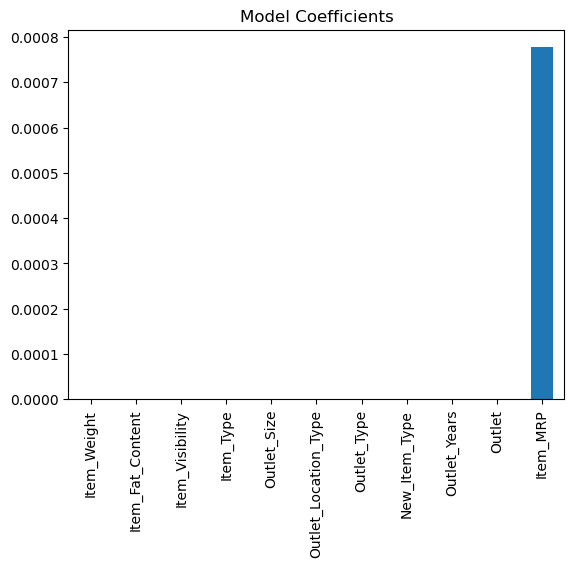

In [124]:
model = Lasso()
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

Model Report
MSE: 0.017492628278573695
CV Score: 0.017497046860516695


<Axes: title={'center': 'Model Coefficients'}>

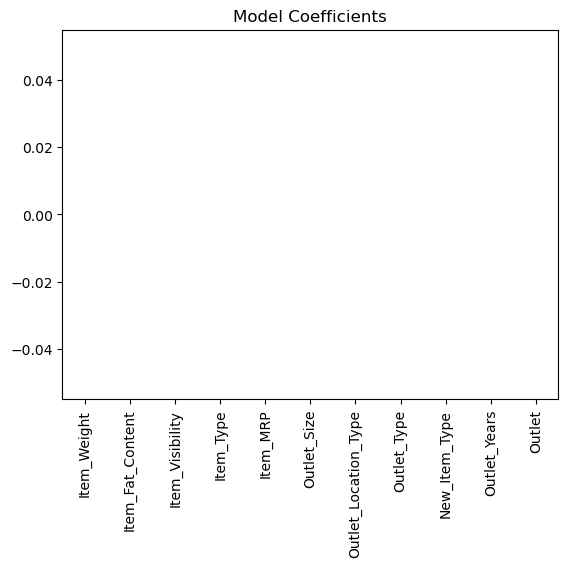

In [136]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = Lasso(alpha=1.5)  
train(model, X_scaled, y)

coef = pd.Series(model.coef_, X.columns).sort_values()

coef.plot(kind='bar', title="Model Coefficients")


Model Report
MSE on Training Set: 0.0006983001813117396
CV Score on Testing Set: 0.00502296733244381


<Axes: title={'center': 'Feature Importance'}>

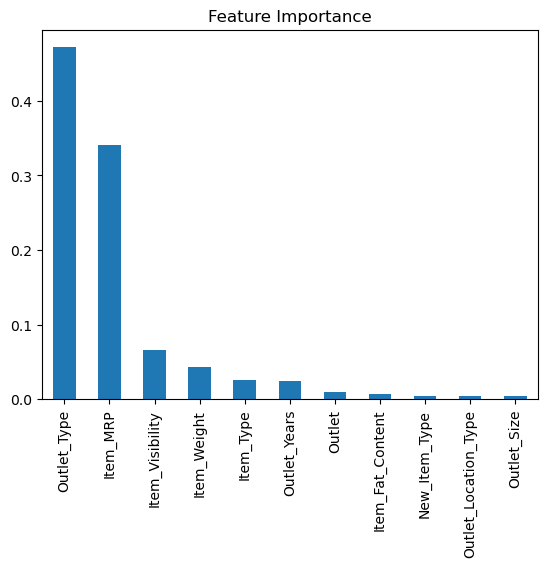

In [118]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Assuming 'X' and 'y' are your features and target variable

# Train the RandomForestRegressor model
model = RandomForestRegressor()
train(model, X, y)

# Get the feature importances and sort them
feature_importances = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)

# Plot the feature importances
feature_importances.plot(kind='bar', title="Feature Importance")


Model Report
MSE: 1.0008909911580774e-29
CV Score: 0.005389993084838205


<Axes: title={'center': 'Feature Importance'}>

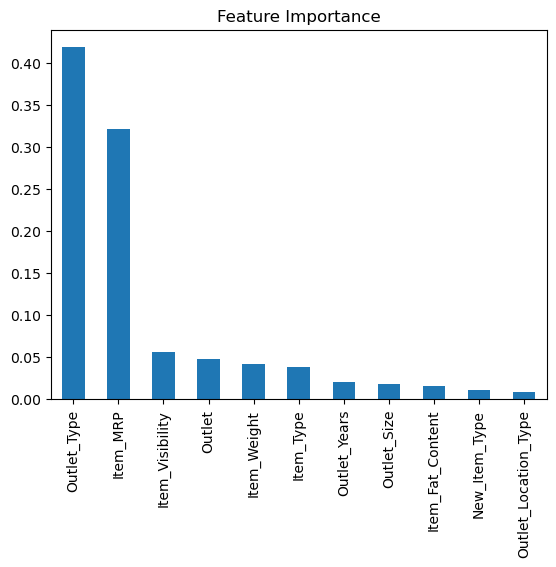

In [138]:
from sklearn.ensemble import ExtraTreesRegressor
import pandas as pd


model = ExtraTreesRegressor()
train(model, X, y)

feature_importances = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)

feature_importances.plot(kind='bar', title="Feature Importance")
